In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


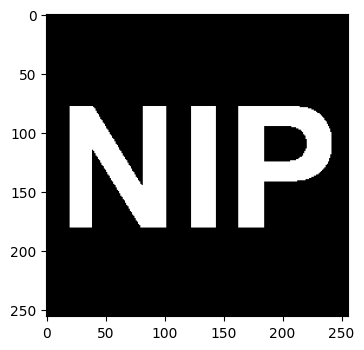

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import cv2 as cv
plt.rcParams['figure.dpi'] = 100

#reading the image file
file_path = "/content/drive/My Drive/S2-2021 APPHY157/B/EdgeDetection/"
fname = "NIP.bmp"
img = io.imread(file_path+fname)
plt.imshow(img, cmap='gray')
plt.show()

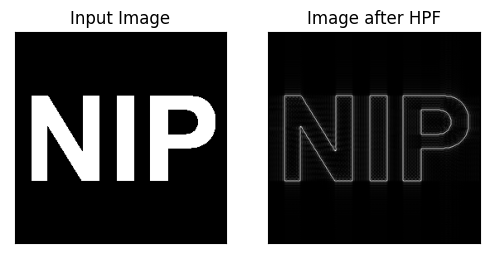

True

In [ ]:
# fft to convert the image to freq domain 
f = np.fft.fft2(img)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# remove the low frequencies by masking with a rectangular window of size 60x60
fshift[crow-60:crow+60, ccol-60:ccol+60] = 0

# shift back
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()
cv.imwrite(f"{file_path}NIPedge.jpg", img_back)